In [1]:
""" Overview:

We want to establish the relationship between a continuous outcome y given features (x_1, x_2, ..., x_n) 
that we can use to predict Y. This is called linear regression. In the simple case, we use only a single feature 
to predict y, i.e., y = b_0 + b_1 * x. In multiple linear regression, we use multiple features to predict y, 
i.e. y = b_0 + b_1 * x_1 + ... + b_n * x_n.

As a case study, we will predict housing prices. We will use pandas to load, matplotlib to plot, and numpy to do 
basic math computations. The process is as follows:

(0) load data (don't forget train-val-test splits!)
(1) normalize data (x - mean(x))/(std(x)), same for y
(2) cat bias to each of the x's
(3) initialize weights
(4) define cost fnc (1/N * sum((x @ weights.T - y)**2))
(5) define backprop deriv = (2/N * sum(x * (x @ weights.T - y)))
    weights = weights - lr * deriv
(6) write up train fnc (early stopping, print progress)
(7) plot loss vs. error


IMPROVEMENT IDEAS: combine everything into one object, separate out regression into piecewise fnc based on
number of bedrooms, add in R^2 (np.sum((y_pred - np.mean(y))**2))/np.sum((y_true - np.mean(y))**2))
and RMSE (sqrt cost), look at correlations of different variables with y (heatmap or plots) and pick the
single variable with the strongest correlation, add in regularization (L1 or L2 norm of weights).
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Load in our data easily using pandas and display a few rows
data = pd.read_csv('../data/housing.txt',names=["size","bedroom","price"])
print(data.head(), '\n')

# Normalization is super important so that no feature dominates all the others.
# We can call this the isotropic assumption (features are all measured in the
# same way across different directions)
data = (data - data.mean())/data.std()
print(data.head())

   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900 

       size   bedroom     price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389


In [3]:
def compute_error(x, y, weights):
    """ Use mean squared error to compute loss. We will use this for
    progress updates """
    tobesummed = np.power(((x @ weights.T) - y),2)
    return np.sum(tobesummed)/(2 * len(x))

In [4]:
def compute_gradient(x, y, weights):
    """ Update weights given predictions, labels, learning rate, and weights matrix
    Includes prediction as part of the computation
    """
    return (1 / len(x)) * np.sum(x * (x @ weights.T - y), axis=0)

In [5]:
def train(x, y, weights, iters, lr, stop_threshold=1e-5):
    """ Function to train
    """
    cost = np.zeros(iters)
    for i in range(iters):
        grad = compute_gradient(x, y, weights)
        weights = weights - lr*grad
        cost[i] = compute_error(x, y, weights)
        
        if i % 50 == 0:
            print('Cost at time step %d: %f'%(i, cost[i]))
            if abs(cost[i] - cost[i-1]) < stop_threshold:
                print('\nEARLY STOPPED.')
                cost = cost[:i]
                break
    
    return weights, cost

In [6]:
# Get up to the last column of our dataframe, which we assume is our Y
features = data.iloc[:, :-1]

# Bias terms
bias = np.ones([features.shape[0], 1])

# Cat bias with feature values
x = np.concatenate((bias, features),axis=1)

# Separate out y
y = np.array(data.iloc[:, -1:])

# Initialize weights matrix
weights = np.zeros([1, x.shape[1]])

# Initialize learning rate, iterations
lr, iters = 0.032, 1000

# Train
weights, cost = train(x, y, weights, iters, lr)

Cost at time step 0: 0.461607
Cost at time step 50: 0.155280
Cost at time step 100: 0.136439
Cost at time step 150: 0.132120
Cost at time step 200: 0.131044
Cost at time step 250: 0.130776

EARLY STOPPED.


In [7]:
weights

array([[-1.11211277e-16,  8.70362908e-01, -3.87786217e-02]])

[]

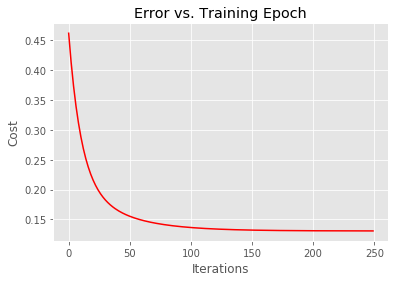

In [9]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(range(len(cost)), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.plot()